In [1]:
#play with levet rule
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
def domi_period_count(state_list_input,dim = 4):
    cross_list = []
    #element in cross list: (index,cross_type)
    #cross type = 1: upper bound going up
    #cross type = 2: lower bound going down
    for i in range(1,len(state_list_input)):
        if state_list_input[i-1]>dim**2/3 and state_list_input[i]<dim**2/3:
            cross_list.append((i,2))
        elif state_list_input[i-1]<2*dim**2/3 and state_list_input[i]>2*dim**2/3:
            cross_list.append((i,1))
    switch_list = [cross_list[0]]
    cross = cross_list[0][1]
    for i in range(1,len(cross_list)):
        if cross_list[i][1] != cross:
            cross = cross_list[i][1]
            switch_list.append(cross_list[i])
    domi_list =[]
    percept_list = []
    for i in range(1,len(switch_list)):
        domi_list.append(switch_list[i][0]-switch_list[i-1][0])
        percept_list.append(switch_list[i-1][1])
    return np.array(domi_list),np.array(percept_list)

In [3]:
domi_period_count([6,7,8,10,12,12,13,14,15,13,12,11,10,10,9,8,7,5,4,3,3,2,3,3,1,4,5,6,7,8,9,10,12])

(array([13, 15]), array([1, 2]))

In [4]:
from gershman_09_function import MRF_prior, proposal_function

In [5]:
def likelihood_levet(z,a,b,sigma_left,sigma_right):
    #bi-modal, mixture of Gaussian function
    #2 peaks at -1 and 1
    #return: a scalar, p(x|z) as a functino of z
    #sigma_left: var of LHS mode; sigma_right: var of RHS mode
    z_vec = z.reshape(-1)
    likelihood_ele = 1/sigma_left*np.exp(-0.5/sigma_left**2*(z+a)**2)+1/sigma_right*np.exp(-0.5/sigma_right**2*(z+b)**2)
    return np.prod(likelihood_ele)

def sample_rejection_levet(z,z_star,a = 1, b = -1,sigma_left = 0.3, sigma_right = 0.3, lamda = 0.05, sigma1 = 1.5 ,mu_array=np.array([0])):
    #input: z is the current sample
    #z_star is the proposed sample
    #if sample accepted: return True
    #if rejected: return False
    p_z = likelihood_levet(z,a,b,sigma_left,sigma_right)*MRF_prior(z,lamda,mu_array)
    p_z_star = likelihood_levet(z_star,a,b,sigma_left,sigma_right)*MRF_prior(z_star,lamda,mu_array)
    p_acc = min(1,p_z_star/p_z)
    if random.random()<p_acc:
        return True
    else:
        return False

In [6]:
#Levet's first proposition

In [7]:
state_list_lr_0303= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star)
    if acc:
        z = z_star
    state_list_lr_0303.append(z)

print('done')

state_list_lr_0305= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_right=0.5)
    if acc:
        z = z_star
    state_list_lr_0305.append(z)
    
print('done')

state_list_lr_0304= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_right=0.4)
    if acc:
        z = z_star
    state_list_lr_0304.append(z)
print('done')

state_list_lr_0302= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_right=0.2)
    if acc:
        z = z_star
    state_list_lr_0302.append(z)
print('done')
    
state_list_lr_0301= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_right=0.1)
    if acc:
        z = z_star
    state_list_lr_0301.append(z)

[[ 0.85507259  0.76422811 -0.07510868 -0.20181944]
 [ 0.11160174  0.06302935  0.17263392  0.35082506]
 [-0.9441814  -0.94075091 -0.27105236  0.38830443]
 [-0.64802996 -0.69107601 -0.67173714 -0.21040227]]
done
[[ 0.22121016 -0.35246399  0.06405062 -0.31472143]
 [ 0.15577493  0.79665668  0.35767025 -0.49561198]
 [-0.41191906  0.85486182 -0.69097879  0.84455599]
 [ 0.02002175 -0.50899762 -0.74883799  0.87833912]]
done
[[-0.31529354 -0.24249051  0.3380537   0.98433409]
 [ 0.00289891  0.1094381  -0.16546421 -0.4945807 ]
 [-0.17731386  0.7170634  -0.83200532  0.17384774]
 [-0.3847797   0.66999544  0.07150837 -0.3996069 ]]
done
[[ 0.97695133  0.29342314 -0.59494035 -0.51528671]
 [-0.45503588 -0.6266289   0.56083212 -0.26245882]
 [ 0.61356069 -0.81158251  0.34316245 -0.18598083]
 [-0.32883711 -0.56136285  0.95728998  0.25633036]]
done
[[-0.30587831 -0.37694961  0.54712005 -0.45494752]
 [-0.05337487  0.51787968 -0.151927   -0.82453031]
 [-0.56422925 -0.67392695  0.76056911 -0.48706346]
 [-0.37

In [8]:
state_num_lr_0301 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0301])
state_num_lr_0302 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0302])
state_num_lr_0303 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0303])
state_num_lr_0304 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0304])
state_num_lr_0305 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0305])

In [9]:
domi_period_lr_0301,domi_percept_lr_0301 = domi_period_count(state_num_lr_0301)
domi_period_lr_0302,domi_percept_lr_0302 = domi_period_count(state_num_lr_0302)
domi_period_lr_0303,domi_percept_lr_0303 = domi_period_count(state_num_lr_0303)
domi_period_lr_0304,domi_percept_lr_0304 = domi_period_count(state_num_lr_0304)
domi_period_lr_0305,domi_percept_lr_0305 = domi_period_count(state_num_lr_0305)

In [10]:
def predomi_count(domi_period,domi_percept):
    domi_1 = 0
    domi_2 = 0
    for i in range(len(domi_period)):
        if domi_percept[i] == 1:
            domi_1 = domi_1 + domi_period[i]
        else:
            domi_2 = domi_2 + domi_period[i]
    return domi_1/np.sum(domi_period),domi_2/np.sum(domi_period)

In [22]:
def ave_domi_count(domi_period,domi_percept):
    domi_1_t = 0
    domi_2_t = 0
    domi_1_count = 0
    domi_2_count = 0
    for i in range(len(domi_period)):
        if int(domi_percept[i]) == 1:
            domi_1_t = domi_1_t + domi_period[i]
            domi_1_count = domi_1_count +1
        else:
            domi_2_t = domi_2_t + domi_period[i]
            domi_2_count = domi_2_count +1
    return domi_1_t/domi_1_count, domi_2_t/domi_2_count

[ 693 1842 1601 ...  207  398   92]


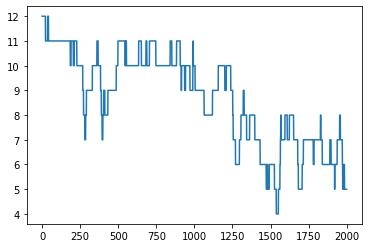

In [11]:
predomi_1 = []
predomi_2 = []
plt.plot(state_num_lr_0301[206524:208524])
print(domi_period_lr_0301)
predomi_0301 = predomi_count(domi_period_lr_0301,domi_percept_lr_0301)
predomi_1.append(predomi_0301[0])
predomi_2.append(predomi_0301[1])
predomi_0302 = predomi_count(domi_period_lr_0302,domi_percept_lr_0302)
predomi_1.append(predomi_0302[0])
predomi_2.append(predomi_0302[1])
predomi_0303 = predomi_count(domi_period_lr_0303,domi_percept_lr_0303)
predomi_1.append(predomi_0303[0])
predomi_2.append(predomi_0303[1])
predomi_0304 = predomi_count(domi_period_lr_0304,domi_percept_lr_0304)
predomi_1.append(predomi_0304[0])
predomi_2.append(predomi_0304[1])
predomi_0305 = predomi_count(domi_period_lr_0305,domi_percept_lr_0305)
predomi_1.append(predomi_0305[0])
predomi_2.append(predomi_0305[1])

In [24]:
ave_domi_1 = []
ave_domi_2 = []
ave_0301 = ave_domi_count(domi_period_lr_0301,domi_percept_lr_0301)
ave_domi_1.append(ave_0301[0])
ave_domi_2.append(ave_0301[1])
ave_0302 = ave_domi_count(domi_period_lr_0302,domi_percept_lr_0302)
ave_domi_1.append(ave_0302[0])
ave_domi_2.append(ave_0302[1])
ave_0303 = ave_domi_count(domi_period_lr_0303,domi_percept_lr_0303)
ave_domi_1.append(ave_0303[0])
ave_domi_2.append(ave_0303[1])
ave_0304 = ave_domi_count(domi_period_lr_0304,domi_percept_lr_0304)
ave_domi_1.append(ave_0304[0])
ave_domi_2.append(ave_0304[1])
ave_0305 = ave_domi_count(domi_period_lr_0305,domi_percept_lr_0305)
ave_domi_1.append(ave_0305[0])
ave_domi_2.append(ave_0305[1])

Text(0, 0.5, 'mean dominance period')

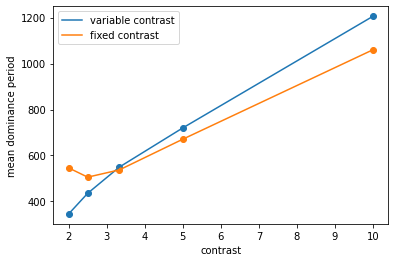

In [41]:
plt.plot(10*np.ones(5)/np.arange(1,6),np.array(ave_domi_1))
plt.plot(10*np.ones(5)/np.arange(1,6),np.array(ave_domi_2))
plt.scatter(10*np.ones(5)/np.arange(1,6),np.array(ave_domi_1))
plt.scatter(10*np.ones(5)/np.arange(1,6),np.array(ave_domi_2))
plt.legend(['variable contrast','fixed contrast'])
plt.xlabel('contrast')
plt.ylabel('mean dominance period')

In [13]:
state_list_lr_0301_2= []
#define initial z
z = (np.random.rand(4,4)-0.25)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_right=0.1)
    if acc:
        z = z_star
    state_list_lr_0301_2.append(z)


[[ 0.46985306 -0.39706389  0.48926804  0.43042173]
 [ 0.08572923  0.03656108  1.49399272 -0.05923573]
 [-0.03783353  0.45972436  1.09960872 -0.15658451]
 [ 1.21464876 -0.33781849  0.19489683  1.32534828]]


In [14]:
state_num_lr_0301_2 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0301_2])
domi_period_lr_0301_2,domi_percept_lr_0301_2 = domi_period_count(state_num_lr_0301_2)
predomi_count(domi_period_lr_0301_2,domi_percept_lr_0301_2)

(0.5439640996126553, 0.4560359003873447)

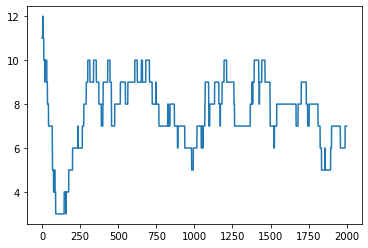

In [15]:
plt.plot(state_num_lr_0301_2[:2000])

Text(0, 0.5, 'predominance of mode 1')

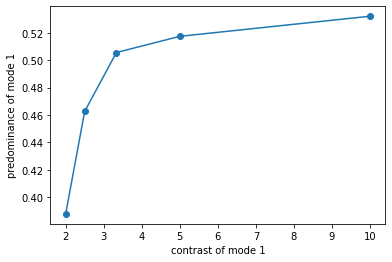

In [19]:
plt.plot(np.ones(5)/np.array([0.1,0.2,0.3,0.4,0.5]),predomi_1)
plt.scatter(np.ones(5)/np.array([0.1,0.2,0.3,0.4,0.5]),predomi_1)
plt.xlabel('contrast of mode 1')
plt.ylabel('predominance of mode 1')

In [17]:
state_list_lr_0505= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_left=0.5, sigma_right=0.5)
    if acc:
        z = z_star
    state_list_lr_0505.append(z)
    
print('done')

state_list_lr_0404= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_left=0.4,sigma_right=0.4)
    if acc:
        z = z_star
    state_list_lr_0404.append(z)
print('done')

state_list_lr_0202= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_left=0.2,sigma_right=0.2)
    if acc:
        z = z_star
    state_list_lr_0202.append(z)
print('done')
    
state_list_lr_0101= []
#define initial z
z = (np.random.rand(4,4)-0.5)*2
print(z)
for i in range(int(2e6)):
    z_star = proposal_function(z)
    acc = sample_rejection_levet(z,z_star,sigma_left = 0.1, sigma_right=0.1)
    if acc:
        z = z_star
    state_list_lr_0101.append(z)

[[ 0.94941013  0.33948927 -0.19238283  0.78318789]
 [ 0.65376941  0.46579642  0.56815915  0.79261666]
 [-0.18786237 -0.71722706 -0.70299911 -0.35466735]
 [ 0.90368287  0.42323909 -0.88333618 -0.26145865]]
done
[[ 0.09560895 -0.66484121 -0.55549897  0.54279263]
 [-0.33971561 -0.13527693  0.87675515 -0.80474979]
 [ 0.33741251  0.52683966 -0.77702835 -0.2678292 ]
 [ 0.50778582 -0.32967398 -0.99772506  0.67849057]]
done
[[ 0.91222209  0.11906461  0.19935124  0.15951045]
 [ 0.30178173  0.98823191  0.11773869  0.7381399 ]
 [ 0.66037573  0.41002004 -0.51386487  0.25570518]
 [-0.46983828 -0.17945369  0.31938835 -0.96119248]]
done
[[ 0.84036582 -0.58392479  0.28766067 -0.98111381]
 [-0.72524908  0.02973575 -0.65517818  0.32863382]
 [-0.35797643 -0.4341519  -0.96747671 -0.89866177]
 [ 0.01055724  0.98896492  0.16942509 -0.47365349]]


In [39]:
state_num_lr_0101 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0101])
state_num_lr_0202 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0202])
state_num_lr_0404 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0404])
state_num_lr_0505 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_lr_0505])

In [40]:
mean_0101 = np.mean(np.array(domi_period_count(state_num_lr_0101)[0]))
mean_0202 = np.mean(np.array(domi_period_count(state_num_lr_0202)[0]))
mean_0303 = np.mean(np.array(domi_period_count(state_num_lr_0303)[0]))
mean_0404 = np.mean(np.array(domi_period_count(state_num_lr_0404)[0]))
mean_0505 = np.mean(np.array(domi_period_count(state_num_lr_0505)[0]))

Text(0, 0.5, 'average dominance period')

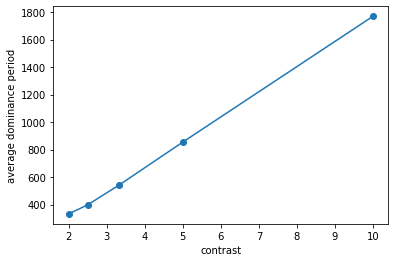

In [42]:
plt.plot(np.ones(5)/np.array([0.1,0.2,0.3,0.4,0.5]),np.array([mean_0101,mean_0202,mean_0303,mean_0404,mean_0505]))
plt.scatter(np.ones(5)/np.array([0.1,0.2,0.3,0.4,0.5]),np.array([mean_0101,mean_0202,mean_0303,mean_0404,mean_0505]))
plt.xlabel('contrast')
plt.ylabel('average dominance period')